In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

#df = pd.read_csv('../input/kc_house_data.csv')
df = pd.read_csv('datasets/kc_house_data.csv')
#df.describe()
#df.info()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [14]:
# set up preprocessing for numeric columns
imp_median = SimpleImputer(strategy='median', add_indicator=True)
scaler = StandardScaler()

# set up preprocessing for categorical columns
imp_constant = SimpleImputer(strategy='constant')
ohe = OneHotEncoder(handle_unknown='ignore')

# select columns by data type
num_cols = make_column_selector(dtype_include='number')
cat_cols = make_column_selector(dtype_exclude='number')

# do all preprocessing
preprocessor = make_column_transformer(
    (make_pipeline(imp_median, scaler), num_cols),
    (make_pipeline(imp_constant, ohe), cat_cols))

# create a pipeline
pipe = make_pipeline(preprocessor, LinearRegression())

# define X and y
X = df.drop(['id','date','price'], axis=1)
y = df['price'].copy()

# fitting
pipe.fit(X,y)
pred = pipe.predict(X)

# scoring
#rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y,pred)),'.3f'))

# cross-validate the pipeline 
cv_score = cross_val_score(pipe, X, y).mean()

print(rmsesm)
print(cv_score)

201165.471
0.6945789499107471


In [16]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

complex_model_3 = linear_model.LinearRegression()

X = df[features]
y = df['price']

complex_model_3.fit(X, y)
pred = complex_model_3.predict(X)

# scoring
#rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y,pred)),'.3f'))

# cross-validate the pipeline 
cv_score = cross_val_score(complex_model_3, X, y).mean()

print(rmsesm)
print(cv_score)

201163.902
0.6945908283283384


In [18]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred3 = poly.predict(X_testpoly)
rmsepoly3 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred3)),'.3f'))
rtrpoly3 = float(format(poly.score(X_trainpoly,train_data['price']),'.3f'))
rtepoly3 = float(format(poly.score(X_testpoly,test_data['price']),'.3f'))
cv3 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['price'],cv=5).mean(),'.3f'))

print(rmsepoly3)
print(cv3)

151178.84
0.813


### Trocando fit_transform por transform na linha 10
deu a mesma coisa

In [64]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

polyfeat = PolynomialFeatures(degree=2)
#X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred3 = poly.predict(X_testpoly)
rmsepoly3 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred3)),'.3f'))
rtrpoly3 = float(format(poly.score(X_trainpoly,train_data['price']),'.3f'))
rtepoly3 = float(format(poly.score(X_testpoly,test_data['price']),'.3f'))
cv3 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['price'],cv=5).mean(),'.3f'))

print(rmsepoly3)
print(cv3)

151178.84
0.813


In [62]:
df_dm = df.copy()

dicionario = {
    'bedrooms': 3,
    'bathrooms': 3,
    'sqft_living': 2000,
    'sqft_lot': 15106,
    'floors': df.floors.median(), 
    'waterfront': 0,
    'view': 0,
    'condition': df_dm.condition.median(),
    'grade': df_dm.grade.median(),
    'sqft_above': df_dm.sqft_above.median(),
    'sqft_basement': df_dm.sqft_basement.median(),
    'yr_built': df_dm.yr_built.median(),
    'yr_renovated': df_dm.yr_renovated.median(),
    'zipcode': df_dm.zipcode.median(),
    'lat': df_dm.lat.median(),
    'long': df_dm.long.median(),
    'sqft_living15': df_dm.sqft_living15.median(),
    'sqft_lot15': df_dm.sqft_lot15.median()
    }

poly.predict(X_testpoly[2].reshape(1, -1))

array([668443.56467056])

In [58]:
X_testpoly[0]

array([ 1.00000000e+00,  3.00000000e+00,  1.75000000e+00,  1.60000000e+03,
        9.57900000e+03,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.00000000e+00,  8.00000000e+00,  1.18000000e+03,  4.20000000e+02,
        1.97700000e+03,  0.00000000e+00,  9.80720000e+04,  4.77662000e+01,
       -1.22159000e+02,  1.75000000e+03,  9.82900000e+03,  9.00000000e+00,
        5.25000000e+00,  4.80000000e+03,  2.87370000e+04,  3.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  9.00000000e+00,  2.40000000e+01,
        3.54000000e+03,  1.26000000e+03,  5.93100000e+03,  0.00000000e+00,
        2.94216000e+05,  1.43298600e+02, -3.66477000e+02,  5.25000000e+03,
        2.94870000e+04,  3.06250000e+00,  2.80000000e+03,  1.67632500e+04,
        1.75000000e+00,  0.00000000e+00,  0.00000000e+00,  5.25000000e+00,
        1.40000000e+01,  2.06500000e+03,  7.35000000e+02,  3.45975000e+03,
        0.00000000e+00,  1.71626000e+05,  8.35908500e+01, -2.13778250e+02,
        3.06250000e+03,  

In [43]:
np.array(list(dicionario.values())).reshape(-1,1)

array([[ 3.00000e+00],
       [ 3.00000e+00],
       [ 2.00000e+03],
       [ 1.51060e+04],
       [ 1.50000e+00],
       [ 0.00000e+00],
       [ 0.00000e+00],
       [ 3.00000e+00],
       [ 7.00000e+00],
       [ 1.56000e+03],
       [ 0.00000e+00],
       [ 1.97500e+03],
       [ 0.00000e+00],
       [ 9.80650e+04],
       [ 4.75718e+01],
       [-1.22230e+02],
       [ 1.84000e+03],
       [ 7.62000e+03]])

In [20]:
# Saving the model
import pickle
pickle.dump(rmsepoly3, open('house-rocket-model.pkl', 'wb'))

In [21]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [22]:
df.view.value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

0.6945789499107471

201165.471


In [25]:
pipe.fit(X,y)
pipe.predict(X)

array([207729.28726608, 734715.21089915, 379486.58524306, ...,
       142743.99025089, 385623.0064137 , 145398.90203307])

In [26]:
df['price_pred'] = pipe.predict(X)

# XGBoost

In [91]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from xgboost import XGBRegressor, plot_importance # XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)



In [77]:
# define X and y
X = df.drop(['id','date','price'], axis=1)
y = df['price'].copy()

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=3)
xgb.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [78]:
y_pred = xgb.predict(X_test)
R2 = xgb.score(X_test,y_test)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print(f'R2 = {R2}')
print(f'RMSE = {RMSE}')

0.8977402276928413
114569.2640933306


In [117]:
kf = KFold(5, shuffle=True, random_state=42)

# poderia passar uma lista no lugar de um dicionário, mas o nome do MSE ficaria muito grande
metrics = {'R2': 'r2',
           'MSE': 'neg_mean_squared_error'}

scores = cross_validate(xgb, X, y, cv=kf, scoring = metrics)
print(f'Scores found: {scores}')

R2 = scores['test_R2']
R2_avg = R2.mean()
MSE = scores['test_MSE']
RMSE = np.sqrt(-MSE)
RMSE_avg = RMSE.mean()
print(f'R2 found on 5-fold Cross Validation: {R2}')
print(f'R2 mean: {R2_avg:0.3f}')
print(f'RMSE found on 5-fold Cross Validation: {RMSE}')
print(f'RMSE mean: {RMSE_avg:0.2f}')


Scores found: {'fit_time': array([5.46607685, 4.74954081, 6.62899303, 6.59241009, 4.60878706]), 'score_time': array([0.03908014, 0.01944113, 0.02204108, 0.02287197, 0.0236299 ]), 'test_R2': array([0.86970806, 0.90252164, 0.89584773, 0.90297766, 0.88882254]), 'test_MSE': array([-1.96971065e+10, -1.44020972e+10, -1.32432311e+10, -1.27313429e+10,
       -1.29483119e+10])}
R2 found on 5-fold Cross Validation: [0.86970806 0.90252164 0.89584773 0.90297766 0.88882254]
R2 mean: 0.892
RMSE found on 5-fold Cross Validation: [140346.3804119  120008.73820954 115079.23849912 112833.25249456
 113790.64964477]
RMSE mean: 120411.65


In [118]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [123]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Usando OneHotEncoder e Scaler 
A performance não melhorou. RMSE muito alto e R2 parecido com do modelo com todas as features sem preprocessamento.
RMSE = 201163.902
R2 = 0.8910136882917861

In [121]:
# set up preprocessing for numeric columns
imp_median = SimpleImputer(strategy='median', add_indicator=True)
scaler = StandardScaler()

# set up preprocessing for categorical columns
imp_constant = SimpleImputer(strategy='constant')
ohe = OneHotEncoder(handle_unknown='ignore')

# select columns by data type
num_cols = make_column_selector(dtype_include='number')
cat_cols = make_column_selector(dtype_exclude='number')

# do all preprocessing
preprocessor = make_column_transformer(
    (make_pipeline(scaler), num_cols),
    (make_pipeline(ohe), cat_cols))

# create a pipeline
pipe = make_pipeline(preprocessor, xgb)

# define X and y
X = df.drop(['id','date','price'], axis=1)
y = df['price'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=3)

# fitting
pipe.fit(X,y)
# pred = pipe.predict(X)
y_pred = pipe.predict(X_test)

# scoring
# rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y,pred)),'.3f'))
# rmsesm = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
# MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(-MSE)


# cross-validate the pipeline 
cv_score = cross_val_score(pipe, X, y).mean()

print(RMSE)
print(cv_score)

201163.902
0.8910136882917861


## Features selecionadas
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [100]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']
# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size = 0.20, random_state=3)
xgb.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [101]:
y_pred = xgb.predict(X_test)
R2 = xgb.score(X_test,y_test)
R2_sklearn = metrics.r2_score(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print(f'R2 = {R2:0.3f}')
print(f'R2_sklearn = {R2:0.3f}')
print(f'RMSE = {RMSE:0.2f}')

R2 = 0.774
R2_sklearn = 0.774
RMSE = 170279.35


In [115]:
kf = KFold(5, shuffle=True, random_state=42)

# poderia passar uma lista no lugar de um dicionário, mas o nome do MSE ficaria muito grande
metrics = {'R2': 'r2',
           'MSE': 'neg_mean_squared_error'}

scores = cross_validate(xgb, X[features], y, cv=kf, scoring = metrics)
print(f'Scores found: {scores}')

R2 = scores['test_R2']
R2_avg = R2.mean()
MSE = scores['test_MSE']
RMSE = np.sqrt(-MSE)
RMSE_avg = RMSE.mean()
print(f'R2 found on 5-fold Cross Validation: {R2}')
print(f'R2 mean: {R2_avg:0.3f}')
print(f'RMSE found on 5-fold Cross Validation: {RMSE}')
print(f'RMSE mean: {RMSE_avg:0.2f}')

# R2_cv = cross_val_score(xgb, X, y, cv=kf, scoring = 'r2')
# R2_cv_avg = R2_cv.mean()
# print(f'R2 found on 5-fold Cross Validation: {R2_cv:0.3f}')
# print(f'R2 mean: {R2_cv_avg:0.3f}')

# MSE_cv = cross_val_score(xgb, X, y, cv=kf, scoring='neg_mean_squared_error')
# RMSE_cv = np.sqrt(-MSE_cv)
# RMSE_cv_avg = RMSE_cv.mean()
# print(f'RMSE found on 5-fold Cross Validation: {RMSE_cv:0.2f}')
# print(f'RMSE mean: {RMSE_cv_avg:0.2f}')


Scores found: {'fit_time': array([3.76574898, 3.13592982, 3.43469071, 3.36547899, 2.64857507]), 'score_time': array([0.02409005, 0.02115512, 0.01874089, 0.02077007, 0.01758718]), 'test_R2': array([0.74532772, 0.78047321, 0.7728117 , 0.79258471, 0.78605207]), 'test_MSE': array([-3.85005183e+10, -3.24343395e+10, -2.88875797e+10, -2.72171868e+10,
       -2.49175027e+10])}
R2 found on 5-fold Cross Validation: [0.74532772 0.78047321 0.7728117  0.79258471 0.78605207]
R2 mean: 0.775
RMSE found on 5-fold Cross Validation: [196215.48952189 180095.36220432 169963.46571223 164976.32198249
 157852.78807846]
RMSE mean: 173820.69


In [112]:
print(f'{R2:0.2f}')

TypeError: unsupported format string passed to numpy.ndarray.__format__

In [113]:
print(f'R2 mean: {R2_avg:0.3f}')


R2 mean: 0.892


## Features Selecionas - Parte 2
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode']

R2 mean: 0.849
RMSE mean: 142453.75

In [130]:
# features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode']

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size = 0.20, random_state=3)
xgb.fit(X_train, y_train)

kf = KFold(5, shuffle=True, random_state=42)

# poderia passar uma lista no lugar de um dicionário, mas o nome do MSE ficaria muito grande
metrics = {'R2': 'r2',
           'MSE': 'neg_mean_squared_error'}

scores = cross_validate(xgb, X[features], y, cv=kf, scoring = metrics)
print(f'Scores found: {scores}')

R2 = scores['test_R2']
R2_avg = R2.mean()
MSE = scores['test_MSE']
RMSE = np.sqrt(-MSE)
RMSE_avg = RMSE.mean()
print(f'R2 found on 5-fold Cross Validation: {R2}')
print(f'R2 mean: {R2_avg:0.3f}')
print(f'RMSE found on 5-fold Cross Validation: {RMSE}')
print(f'RMSE mean: {RMSE_avg:0.2f}')

Scores found: {'fit_time': array([1.89754796, 1.60936284, 1.59935212, 1.58911324, 1.58402514]), 'score_time': array([0.0199492 , 0.01996398, 0.01505995, 0.01798606, 0.01665783]), 'test_R2': array([0.81834852, 0.85387193, 0.85201627, 0.86967477, 0.85113331]), 'test_MSE': array([-2.74614739e+10, -2.15899267e+10, -1.88165144e+10, -1.71013733e+10,
       -1.73377984e+10])}
R2 found on 5-fold Cross Validation: [0.81834852 0.85387193 0.85201627 0.86967477 0.85113331]
R2 mean: 0.849
RMSE found on 5-fold Cross Validation: [165715.03817433 146935.11057609 137173.30065852 130772.21924521
 131673.07380149]
RMSE mean: 142453.75


## Gridsearch com Features Selecionadas
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode']

In [136]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [131]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08, max_bin=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None, ...)

In [140]:
#brute force scan for all parameters, here are the tricks
#usually max_depth is 6,7,8
#learning rate is around 0.05, but small changes may make big diff
#tuning min_child_weight subsample colsample_bytree can have 
#much fun of fighting against overfit 
#n_estimators is how many round of boosting
#finally, ensemble xgboost with multiple seeds may reduce variance
# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['binary:logistic'],
#               'learning_rate': [0.05], #so called `eta` value
#               'max_depth': [6],
#               'min_child_weight': [11],
#               'silent': [1],
#               'subsample': [0.8],
#               'colsample_bytree': [0.7],
#               'n_estimators': [5], #number of trees, change it to 1000 for better results
#               'missing':[-999],
#               'seed': [1337]}

colsample_bytree = [0.3, 0.5, 1.0, 2.0]
gamma = [0, 0.1, 1, 1.5]
learning_rate = [0.001, 0.01, 0.08, 0.1]
min_child_weight = [1, 5, 10, 20]
scale_pos_weight = [0.5, 1, 2, 4, 6]
subsample = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
n_estimators = [25, 50, 100, 150]
max_depth = [3, 5, 10, 20, 40, 100]

param_distributions = dict(
    colsample_bytree=colsample_bytree,
    gamma=gamma,
    learning_rate=learning_rate,
    min_child_weight=min_child_weight,
    scale_pos_weight=scale_pos_weight,
    subsample=subsample,
    n_estimators=n_estimators,
    max_depth=max_depth,
)

# parameters = {
#               'learning_rate': [0.05], #so called `eta` value
#               'max_depth': [6],
#               'min_child_weight': [11],
#               'silent': [1],
#               'subsample': [0.8],
#               'colsample_bytree': [0.7],
#               'n_estimators': [5], #number of trees, change it to 1000 for better results
#               'missing':[-999],
#               'seed': [1337]}

In [141]:
model = XGBRegressor(random_state=1, verbosity=1)
grid_search = RandomizedSearchCV(estimator=model,
                                 param_distributions=param_distributions,
                                 scoring='neg_mean_squared_error',
                                )
best_model = grid_search.fit(X_train, y_train)
print('Optimum parameters', best_model.best_params_)

Optimum parameters {'subsample': 0.5, 'scale_pos_weight': 1, 'n_estimators': 50, 'min_child_weight': 5, 'max_depth': 40, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.5}


In [142]:
best_model

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_ca...
                                          reg_alpha=None, reg_lambda=None, ...),
                   param_distributions={'colsample_bytree': [0.3, 0.5, 1.0,
                                                             2.0],
                                        'gamma': [0, 0.1, 1, 1.5],
                                        'learning_rate': [0.001, 0.01, 0.08,
                                                          0.1],
                                        'max_depth': [3, 5, 10, 20, 40, 100],
                                        'min_child_weight': [1, 5, 10, 20],
                                        'n_estimators': [25, 50, 100, 150],
                                        'scale_pos_weight': [0.5, 1, 2, 4, 6],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1.0]},
                   scoring='neg_mean_squared_error')

In [143]:
tuned_model = XGBRegressor( random_state=1, 
                            colsample_bytree=0.5, 
                            learning_rate=0.1, 
                            max_depth=40, 
                            min_child_weight=5,
                            n_estimators=50,
                            gamma = 0,
                            scale_pos_weight = 1,
                            subsample=0.5)
                            
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(tuned_model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC/AUC = ', scores.mean())

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size = 0.20, random_state=3)
tuned_model.fit(X_train, y_train)

kf = KFold(5, shuffle=True, random_state=42)

# poderia passar uma lista no lugar de um dicionário, mas o nome do MSE ficaria muito grande
metrics = {'R2': 'r2',
           'MSE': 'neg_mean_squared_error'}

scores = cross_validate(tuned_model, X[features], y, cv=kf, scoring = metrics)
print(f'Scores found: {scores}')

R2 = scores['test_R2']
R2_avg = R2.mean()
MSE = scores['test_MSE']
RMSE = np.sqrt(-MSE)
RMSE_avg = RMSE.mean()
print(f'R2 found on 5-fold Cross Validation: {R2}')
print(f'R2 mean: {R2_avg:0.3f}')
print(f'RMSE found on 5-fold Cross Validation: {RMSE}')
print(f'RMSE mean: {RMSE_avg:0.2f}')

Scores found: {'fit_time': array([2.38117099, 2.90311599, 2.45749521, 2.56715894, 2.54315591]), 'score_time': array([0.02131701, 0.0299952 , 0.0191958 , 0.02322197, 0.02687311]), 'test_R2': array([0.83113869, 0.84871973, 0.84953735, 0.85977406, 0.85232278]), 'test_MSE': array([-2.55278980e+10, -2.23511470e+10, -1.91317153e+10, -1.84005514e+10,
       -1.71992668e+10])}
R2 found on 5-fold Cross Validation: [0.83113869 0.84871973 0.84953735 0.85977406 0.85232278]
R2 mean: 0.848
RMSE found on 5-fold Cross Validation: [159774.52223625 149502.99990375 138317.4438422  135648.63226487
 131145.97498143]
RMSE mean: 142877.91


In [133]:
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.08,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 7,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.75,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [125]:
df.yr_renovated.value_counts()

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

<AxesSubplot:>

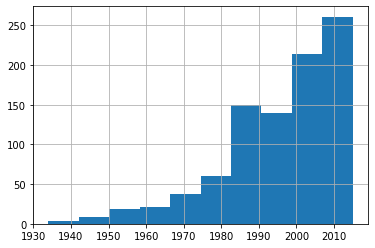

In [126]:
df.loc[df.yr_renovated!=0,'yr_renovated'].hist()

In [129]:
df.grade.value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

# Cross-validation com Iris dataset
https://github.com/vaasha/Machine-leaning-in-examples/blob/master/sklearn/cross-validation/Cross%20Validation.ipynb

## 0. Imports

In [144]:
# Import scikit-learn libraries
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.datasets import load_iris, load_boston
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

## 1. Loading Dataset and creating folds

In [145]:
# initialize the model
model = LogisticRegression(solver="liblinear", multi_class="auto")

In [148]:
iris = load_iris(return_X_y=False)
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
features = iris['feature_names']
iris_df['target'] = iris.target
iris_df["target_name"] = iris_df['target'].map({i:name for i,name in enumerate(iris.target_names)})
iris_df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
71,6.1,2.8,4.0,1.3,1,versicolor
114,5.8,2.8,5.1,2.4,2,virginica
5,5.4,3.9,1.7,0.4,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa


## 2. O train_test_split faz shuffle automático

In [149]:
#Logistic regression without Kfold, just split into 80% train and 20% test set
X = iris_df[features]
y = iris_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Shuffle (mixed index)

In [168]:
y_test.head()

73     1
18     0
118    2
78     1
76     1
Name: target, dtype: int64

Stratification (same proportion)

In [167]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

1    0.341667
0    0.333333
2    0.325000
Name: target, dtype: float64
2    0.366667
0    0.333333
1    0.300000
Name: target, dtype: float64


Score for this specific split

In [150]:
#Train the model
model.fit(X_train, y_train) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_train, model.predict(X_train))],
    "Accurancy on Test":[accuracy_score(y_test, model.predict(X_test))]})

,Accurancy on Train,Accurancy on Test
0,0.958333,1.0


## 3. KFold
O KFold sem shuffle ativado cria folds organizados.
Aqui temos um problema ao usar KFold sem shuffle: A performance oscila muito dependendo do fold

In [ ]:
# to demonstrate how the data are split, we will create 3 and 5 folds. 
# KFold function has to be applied on the data and it returns an location (index) of the train and test samples.
kf5 = KFold(n_splits=5, shuffle=False)
kf3 = KFold(n_splits=3, shuffle=False)

In [151]:
cross_validate(model, X, y, cv=kf5)

{'fit_time': array([0.00527406, 0.00360203, 0.00370908, 0.00549626, 0.00353503]),
 'score_time': array([0.0032599 , 0.00294995, 0.00369811, 0.00855494, 0.00211   ]),
 'test_score': array([1.        , 0.93333333, 0.43333333, 0.96666667, 0.43333333])}

In [157]:
np.mean([1.        , 0.93333333, 0.43333333, 0.96666667, 0.43333333])

0.753333332

Sem KFold a performance melhora bastante pois há um shuffle automático

In [163]:
cross_validate(model, X, y, cv=5)


{'fit_time': array([0.00609827, 0.00491977, 0.00426412, 0.00323391, 0.00925183]),
 'score_time': array([0.00405669, 0.00334001, 0.00212693, 0.00368428, 0.00307393]),
 'test_score': array([1.        , 0.96666667, 0.93333333, 0.9       , 1.        ])}

In [164]:
np.mean([1.        , 0.96666667, 0.93333333, 0.9       , 1.        ])


0.96

O mesmo acontece com 3 folds. Aqui temos um caso mais extremo ainda sem shuffle. A performance cai para 0 pois os dados estão ordenados, de modo que cada fold contém duas espécies no split de treino e outra espécie no split de teste.

In [152]:
cross_validate(model, X, y, cv=kf3)

{'fit_time': array([0.00507998, 0.00503969, 0.00413013]),
 'score_time': array([0.0028739 , 0.00308514, 0.00399899]),
 'test_score': array([0., 0., 0.])}

In [162]:
cross_validate(model, X, y, cv=3)   

{'fit_time': array([0.00628376, 0.00540924, 0.00609112]),
 'score_time': array([0.00371909, 0.00636101, 0.00294399]),
 'test_score': array([0.96, 0.96, 0.94])}

Aqui podemos ver a melhora dos scores usando KFold com shuffle. Porém os dados estão desbalanceados.

In [153]:
kf = KFold(n_splits=3, shuffle=True, random_state=123)
cross_validate(model, X, y, cv=kf)


{'fit_time': array([0.00958204, 0.00562716, 0.00427389]),
 'score_time': array([0.00351906, 0.00431681, 0.00292826]),
 'test_score': array([0.98, 0.94, 0.88])}

## 4. Stratified KFold (Balanced Folds)
Usando Stratified KFold com shuffle False e True

In [170]:
kf = StratifiedKFold(n_splits=3, shuffle=False)
cross_validate(model, X, y, cv=kf)

{'fit_time': array([0.00451708, 0.00535297, 0.00464702]),
 'score_time': array([0.00208092, 0.00289488, 0.00309491]),
 'test_score': array([0.96, 0.96, 0.94])}

In [155]:
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)
cross_validate(model, X, y, cv=kf)


{'fit_time': array([0.00328207, 0.00468087, 0.00377703]),
 'score_time': array([0.00181317, 0.00185394, 0.00264192]),
 'test_score': array([0.94, 0.98, 0.92])}

# Outros

<AxesSubplot:>

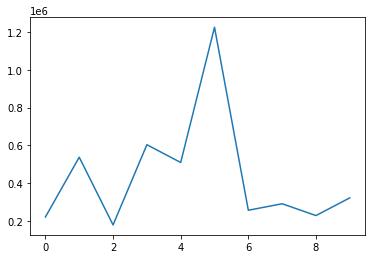

In [28]:
df.price[0:10].plot()

In [34]:
df.sort_values('price').price.sns.scatterplot()

AttributeError: 'Series' object has no attribute 'sns'

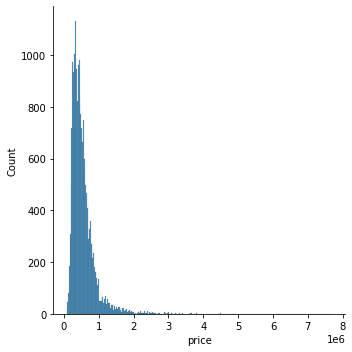

In [35]:
sns.displot(x='price', data=df)

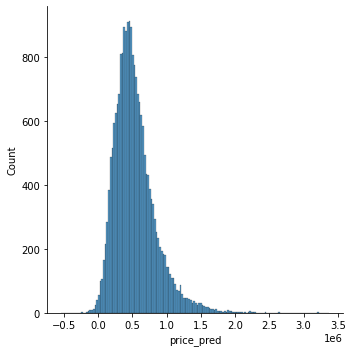

In [36]:
sns.displot(x='price_pred', data=df)

<AxesSubplot:xlabel='price', ylabel='Count'>

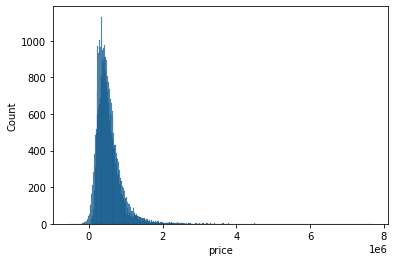

In [39]:
sns.histplot(x='price', data=df)
sns.histplot(x='price_pred', data=df)

In [40]:
sns.histplot(x='price', data=df)

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 21613 and the vector passed to `x` has length 2.

In [41]:
df.price.corr(df.price_pred)

0.8365074720365999

<AxesSubplot:xlabel='price', ylabel='price_pred'>

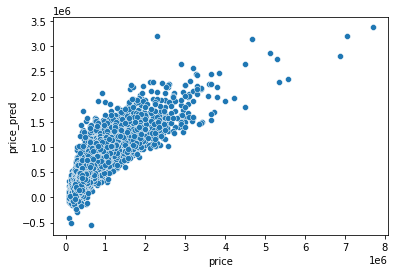

In [42]:
sns.scatterplot(x='price', y='price_pred', data=df)

In [44]:
df['price_diff'] = df.price_pred - df.price

In [48]:
df.loc[df.price_diff>0].sort_values('price_diff', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_pred,price_diff
8450,121039042,20150313T000000,425000.0,3,2.75,3610,107386,1.5,1,3,...,480,1918,1962,98023,47.3351,-122.362,2630,42126,1.717564e+06,1.292564e+06
21050,2424059170,20150219T000000,900000.0,5,6.00,7120,40806,2.0,0,4,...,1640,2007,0,98006,47.5451,-122.114,3440,36859,2.062561e+06,1.162561e+06
4024,9175600025,20141007T000000,800000.0,7,6.75,7480,41664,2.0,0,2,...,2400,1953,0,98166,47.4643,-122.368,2810,33190,1.904045e+06,1.104045e+06
18848,7631800110,20140918T000000,380000.0,3,2.50,1980,17342,2.0,1,4,...,400,1984,0,98166,47.4551,-122.373,2060,17313,1.427062e+06,1.047062e+06
17474,6329000185,20150329T000000,540000.0,3,2.50,2600,23361,1.5,1,4,...,450,1912,0,98146,47.4997,-122.379,1700,14700,1.565075e+06,1.025075e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15096,952000725,20141021T000000,442000.0,2,1.00,990,4313,1.5,0,2,...,0,1917,0,98126,47.5677,-122.380,1480,5750,4.420794e+05,7.940297e+01
5201,8857600680,20150313T000000,285900.0,5,1.50,1690,7725,1.5,0,0,...,0,1961,0,98032,47.3859,-122.288,1690,7739,2.859778e+05,7.775279e+01
17234,7796000095,20150106T000000,1085000.0,3,2.75,3170,34850,1.0,0,0,...,0,1957,0,98033,47.6611,-122.169,3920,36740,1.085064e+06,6.390295e+01
20149,2771102144,20140502T000000,385000.0,3,3.25,1320,1327,2.0,0,0,...,280,2008,0,98199,47.6506,-122.383,1440,1263,3.850506e+05,5.060807e+01


In [68]:
df.loc[(df.price_diff>0) & (df.price_pred<1.3*df.price)].sort_values('price_diff', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_pred,price_diff
3934,1269200229,20140723T000000,1379900.0,3,3.25,3786,38038,1.0,1,4,...,1852,1978,2006,98070,47.3907,-122.448,2850,33361,1.741636e+06,361735.999768
16225,284000095,20140922T000000,1200000.0,2,2.25,2160,17861,2.0,1,4,...,0,1956,0,98146,47.5020,-122.385,2660,18530,1.556483e+06,356482.694860
1417,7663700030,20150503T000000,1175000.0,2,2.50,1770,7155,2.0,1,4,...,0,1957,2004,98155,47.7345,-122.285,2410,10476,1.520794e+06,345793.869255
9112,7352200100,20150224T000000,1360000.0,2,1.75,2620,14138,2.0,1,4,...,500,1931,1991,98125,47.7142,-122.277,1830,8279,1.688922e+06,328922.385178
11685,1126069045,20140620T000000,1135000.0,6,4.25,6900,244716,2.0,0,0,...,2080,2002,0,98077,47.7506,-122.012,4170,266587,1.454735e+06,319735.137274
5063,7237550020,20140703T000000,1100000.0,4,3.75,5070,60123,2.0,0,0,...,0,2000,0,98053,47.6567,-122.004,4920,101930,1.419152e+06,319152.180314
9840,7852011070,20150109T000000,1140000.0,6,3.75,5960,20197,2.0,0,4,...,2060,2005,0,98065,47.5398,-121.869,3860,12800,1.447370e+06,307370.474629
12429,98001070,20140818T000000,1169000.0,5,4.25,4610,13252,2.0,0,4,...,0,2004,0,98075,47.5878,-121.969,4400,15154,1.475255e+06,306254.579689
7846,4139420590,20140827T000000,1200000.0,4,3.50,4560,16643,1.0,0,3,...,2330,1995,0,98006,47.5521,-122.115,4060,15177,1.503040e+06,303039.587916
5024,98000950,20141210T000000,1060000.0,4,5.25,4140,14757,2.0,0,2,...,0,2005,0,98075,47.5871,-121.969,4440,15523,1.360426e+06,300425.830227


In [49]:
print(df.price.mean())
print(df.price_pred.mean())

540088.1417665294
540085.7133661347


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

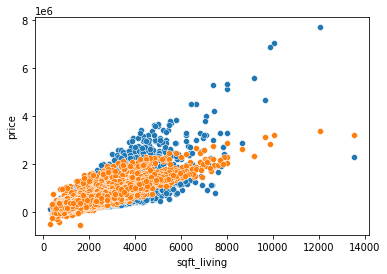

In [72]:
sns.scatterplot(x = 'sqft_living', y = 'price', data = df)
sns.scatterplot(x = 'sqft_living', y = 'price_pred', data = df)

<AxesSubplot:xlabel='sqft_living', ylabel='price_pred'>

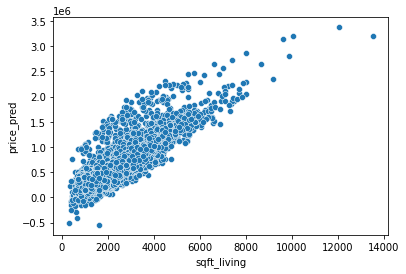

In [71]:
sns.scatterplot(x = 'sqft_living', y = 'price_pred', data = df)

### Only positive coefficients

In [50]:
# set up preprocessing for numeric columns
imp_median = SimpleImputer(strategy='median', add_indicator=True)
scaler = StandardScaler()

# set up preprocessing for categorical columns
imp_constant = SimpleImputer(strategy='constant')
ohe = OneHotEncoder(handle_unknown='ignore')

# select columns by data type
num_cols = make_column_selector(dtype_include='number')
cat_cols = make_column_selector(dtype_exclude='number')

# do all preprocessing
preprocessor = make_column_transformer(
    (make_pipeline(imp_median, scaler), num_cols),
    (make_pipeline(imp_constant, ohe), cat_cols))

# create a pipeline
pipe = make_pipeline(preprocessor, LinearRegression(positive=True))

In [51]:
# cross-validate the pipeline
cross_val_score(pipe, X, y).mean()

0.664386537618522

In [52]:
pipe.fit(X,y)
pipe.predict(X)

array([246242.37188676, 748734.81438055, 265963.86616155, ...,
       271331.27503915, 417887.3215038 , 271129.45420815])

In [55]:
df2 = df.copy()
df2['price_pred'] = pipe.predict(X)

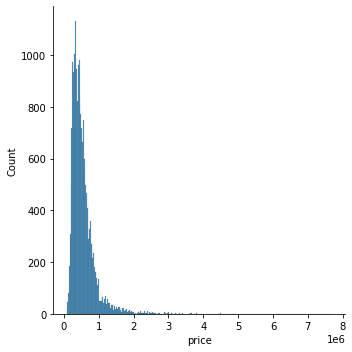

In [56]:
sns.displot(x='price', data=df2)

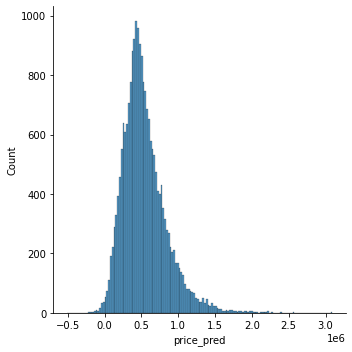

In [57]:
sns.displot(x='price_pred', data=df2)

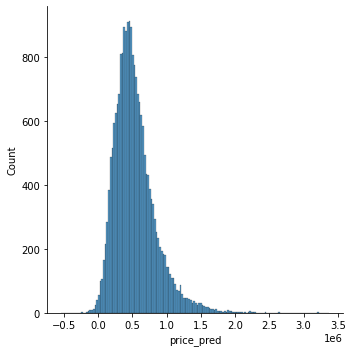

In [58]:
sns.displot(x='price_pred', data=df)

In [60]:
df2.loc[df2.price_pred<0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_pred,price_diff
46,8945200830,20150325T000000,210490.0,3,1.00,990,8528,1.0,0,0,...,0,1966,0,98023,47.3066,-122.371,1228,8840,-10436.272523,-173840.811594
350,7325600160,20140604T000000,299000.0,1,0.75,560,12120,1.0,0,0,...,0,1967,0,98014,47.6750,-121.854,1300,19207,-4439.586279,-358621.054861
411,2422029094,20140716T000000,517534.0,2,1.00,833,143947,1.0,0,0,...,0,2006,0,98070,47.3889,-122.482,1380,143947,-64794.744847,-658743.546543
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,0,1912,0,98014,47.6499,-121.909,1200,7500,-102482.569759,-47413.725832
704,41000454,20140815T000000,130000.0,2,1.00,880,9000,1.0,0,0,...,0,1928,0,98188,47.4672,-122.291,1410,10000,-3998.852397,-86480.512810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19121,1670400090,20141124T000000,182000.0,3,1.00,1160,18055,1.0,0,0,...,0,1950,0,98168,47.4772,-122.269,1340,10324,-11032.527460,-195388.726176
19285,844001145,20150326T000000,208500.0,2,1.00,880,4814,1.0,0,0,...,0,1906,0,98010,47.3107,-121.999,1010,6160,-56783.782703,-142104.054109
19344,2114700090,20150301T000000,151000.0,2,0.75,720,5040,1.0,0,0,...,0,1949,0,98106,47.5323,-122.347,1290,4120,-74460.652219,-199704.363786
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,0,1963,0,98024,47.5308,-121.888,1620,22850,-516707.159413,-654713.738465


In [61]:
df.loc[df.price_pred<0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_pred,price_diff
350,7325600160,20140604T000000,299000.0,1,0.75,560,12120,1.0,0,0,...,0,1967,0,98014,47.6750,-121.854,1300,19207,-59621.054861,-358621.054861
411,2422029094,20140716T000000,517534.0,2,1.00,833,143947,1.0,0,0,...,0,2006,0,98070,47.3889,-122.482,1380,143947,-141209.546543,-658743.546543
630,5437820310,20140523T000000,218000.0,3,1.00,960,9633,1.0,0,0,...,0,1982,0,98022,47.1951,-122.001,1080,8610,-107056.786323,-325056.786323
860,1723049033,20140620T000000,245000.0,1,0.75,380,15000,1.0,0,0,...,0,1963,0,98168,47.4810,-122.323,1170,15000,-92485.652093,-337485.652093
1096,4366700140,20141219T000000,241000.0,3,1.00,1010,9611,1.0,0,0,...,0,1973,0,98092,47.3006,-122.066,1200,9611,-61743.938141,-302743.938141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19173,9456200405,20150310T000000,205950.0,3,1.00,970,11963,1.0,0,0,...,0,1970,0,98198,47.3776,-122.315,1210,11963,-23361.724350,-229311.724350
19344,2114700090,20150301T000000,151000.0,2,0.75,720,5040,1.0,0,0,...,0,1949,0,98106,47.5323,-122.347,1290,4120,-48704.363786,-199704.363786
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,0,1963,0,98024,47.5308,-121.888,1620,22850,-512713.738465,-654713.738465
20969,2781270530,20150326T000000,193000.0,2,1.75,910,2550,1.0,0,0,...,0,2004,0,98038,47.3494,-122.022,1310,2550,-64272.720855,-257272.720855
